In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns # Graphing
import gc


In [38]:
pd.set_option('max_columns', None)


In [3]:
train_df = pd.read_csv('/accounts/grad/huz4/Desktop/STAT222/train_data.csv')

In [4]:
print(train_df.shape)

(2369088, 61)


In [5]:
## 0 ratio for the room count
len(train_df[train_df['roomcnt']==0])/len(train_df['roomcnt'])*100

77.50049808196235

## NA count on train data

In [5]:
df =train_df.isnull().sum(axis =0)
df.columns=['features','miss_count']
df

parcelid                          0
airconditioningtypeid       1717246
architecturalstyletypeid    2364261
basementsqft                2367773
bathroomcnt                       0
                             ...   
taxdelinquencyyear          2323998
censustractandblock           51437
price                             0
dist_to_dtla                      0
dist_to_ocean                     0
Length: 61, dtype: int64

### NA plots

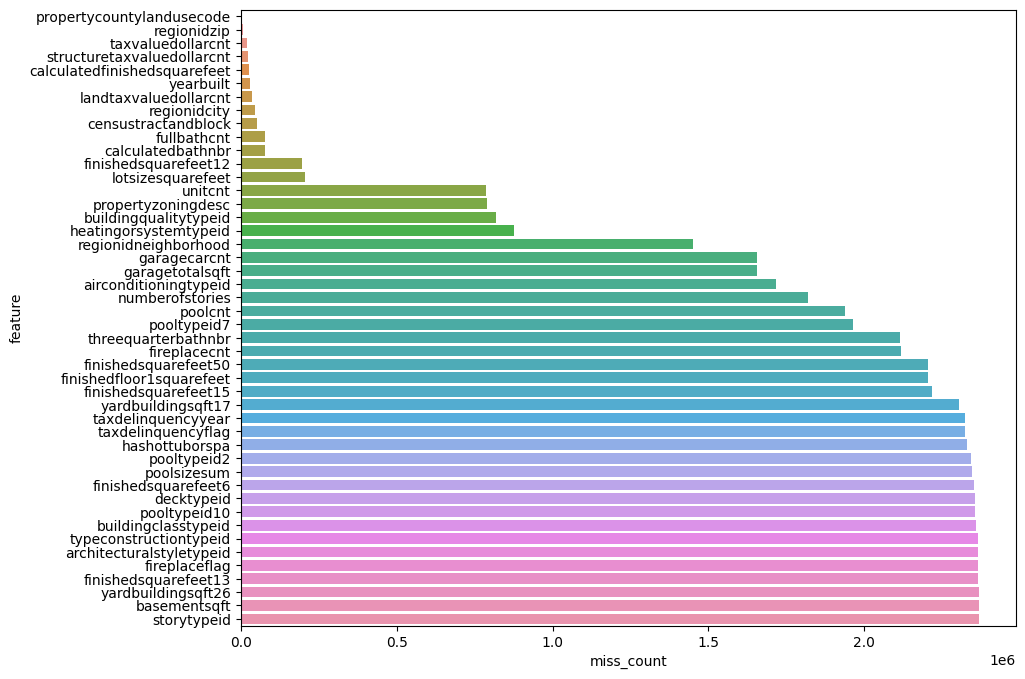

In [6]:
def plot_missing(theDataFrame, fs=(10,8)):
    """
    Graph the number of missing values in each column (each feature)
    
    return:
    None
    """
    # A new dataframe that contains the count of null items for each category (axis=0)
    missingvals_df = theDataFrame.isnull().sum(axis=0).reset_index()
    missingvals_df.columns = ['feature', 'miss_count'] # Rename the column names to feature and miss count
    missingvals_df = missingvals_df.loc[missingvals_df['miss_count'] > 0] # Filter out the features that have values for every entry
    missingvals_df = missingvals_df.sort_values(by='miss_count') # Sort

    # Plot
    fig, ax = plt.subplots(figsize=fs)
    sns.barplot(data=missingvals_df, x='miss_count', y='feature', orient='h', ax=ax)
plot_missing(train_df)

In [8]:
missing_ratio_df = pd.DataFrame((train_df.isnull().sum()/len(train_df)),columns=['missing_ratio'])
x=missing_ratio_df.loc[missing_ratio_df['missing_ratio']>0.2]

### Function to drop columns with a threshold

In [7]:
def drop_column(data, threshold =0.2):
    # This function find the missing value ratio for each column
    # with default threshold =0.2, this function will find column with missing data ratio more than 0.2
    # return: column name with missing ratio less than 0.2
    column_na_ratio = pd.DataFrame((data.isnull().sum()/len(data)),columns=['missing_ratio']) # A dataframe to store column missing ratio
    drop_column  = column_na_ratio.loc[column_na_ratio['missing_ratio'] > threshold].index.to_list()
    
    return drop_column

In [8]:
drop_list = drop_column(train_df)
drop_list

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertyzoningdesc',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

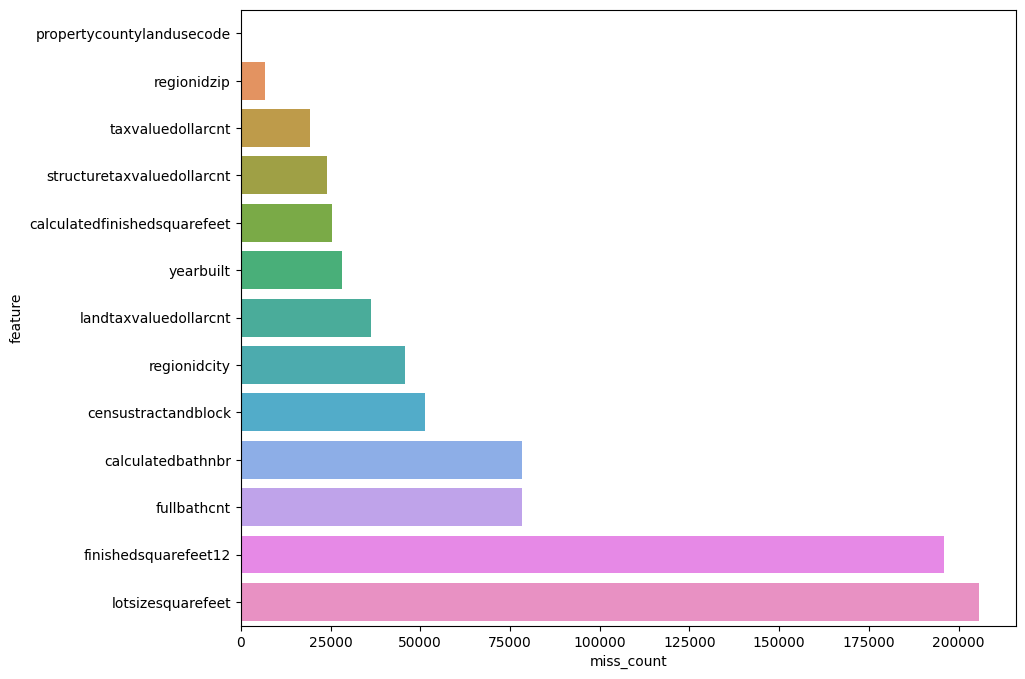

In [9]:
train_df.drop(columns=drop_list, inplace=True)
plot_missing(train_df)

In [12]:
train_df.head(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,price,dist_to_dtla,dist_to_ocean
0,12827674,2.0,3.0,2.0,1283.0,1283.0,6037.0,2.0,33940845.0,-117990639.0,...,1952.0,155162.0,414349.0,2016.0,259187.0,5065.13,6.037503e+13,6.176988e+05,16.716825,25.710279
1,17146745,2.0,3.0,2.0,1567.0,1567.0,6111.0,2.0,34216499.0,-119200476.0,...,1969.0,142728.0,237878.0,2016.0,95150.0,2779.18,6.111003e+13,3.389244e+05,55.479358,3.514357
2,14749753,3.0,3.0,3.0,1562.0,1562.0,6059.0,3.0,33449726.0,-117627509.0,...,1985.0,181229.0,388227.0,2016.0,206998.0,3944.88,6.059042e+13,4.810829e+05,54.768499,2.183094
3,14034009,3.0,4.0,3.0,2298.0,2298.0,6059.0,3.0,33725613.0,-117926810.0,...,1964.0,209160.0,399294.0,2016.0,190134.0,4580.64,6.059099e+13,5.586146e+05,29.087747,25.076866
4,12396414,1.0,3.0,1.0,1394.0,1394.0,6037.0,1.0,33975237.0,-118089132.0,...,1949.0,33319.0,58353.0,2016.0,25034.0,1207.96,6.037502e+13,1.473122e+05,10.612760,21.809583
5,11568719,3.0,2.0,3.0,2201.0,2201.0,6037.0,3.0,34052100.0,-118462000.0,...,1994.0,143404.0,245071.0,2016.0,101667.0,2997.35,6.037264e+13,3.655305e+05,12.035477,28.512628
6,11801169,2.0,4.0,2.0,1804.0,NaN,6037.0,2.0,34037803.0,-118197235.0,...,1932.0,172120.0,338808.0,2016.0,166688.0,4236.06,6.037204e+13,5.165927e+05,3.215022,20.785715
7,11752976,2.0,3.0,2.0,2039.0,2039.0,6037.0,2.0,34053255.0,-118356592.0,...,1925.0,180376.0,901882.0,2016.0,721506.0,10971.12,6.037217e+13,1.337941e+06,6.006878,34.546820
8,17261533,2.0,4.0,2.0,1826.0,1826.0,6111.0,2.0,34278616.0,-118677800.0,...,1974.0,208856.0,417712.0,2016.0,208856.0,4862.18,6.111008e+13,5.929488e+05,29.073683,34.342282
9,17147309,3.0,4.0,3.0,2359.0,2359.0,6111.0,3.0,34210187.0,-119198212.0,...,1987.0,259753.0,398358.0,2016.0,138605.0,4738.46,6.111003e+13,5.778610e+05,55.265076,3.701666


## Make initial Correlation matrix

### Make correlation plot on filtered dataframe

In [1]:
correlation = train_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation, cmap='BrBG', annot=True)


NameError: name 'train_df' is not defined

### Drop highly correlated columns (replicated columns) and Geo information

In [10]:
train_df.drop(columns = ['calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 
                         'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 
                         'structuretaxvaluedollarcnt','fips', 'rawcensustractandblock'], inplace = True)
train_df.drop(columns = ['latitude', 'longitude', 'regionidcounty', 'regionidcity', 'regionidzip'], inplace = True)
train_df.drop(columns = ['parcelid'], inplace = True)

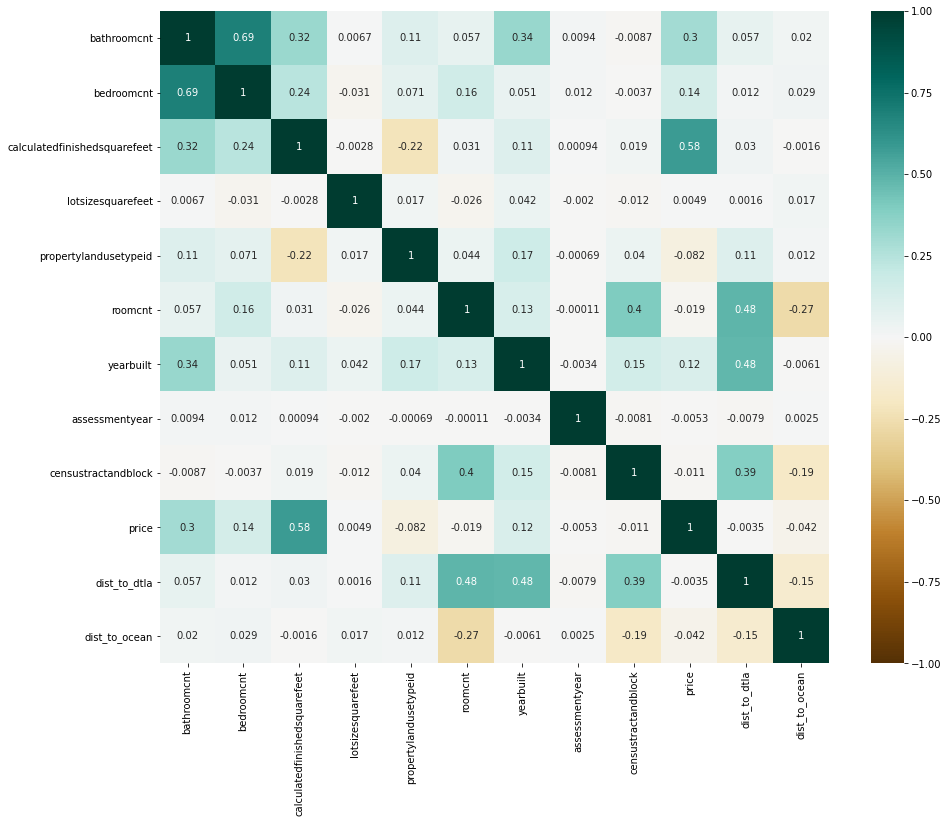

In [15]:
correlation = train_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, cmap='BrBG', annot=True, vmin=-1, vmax=1)

## EDA 
### Analysis based on different type of property land type
31 :Commercial/Office/Residential Mixed Used

46 :Multi-Story Store

47 :Store/Office (Mixed Use)

246 :Duplex (2 Units, Any Combination)

247: Triplex (3 Units, Any Combination)

248: Quadruplex (4 Units, Any Combination)

260: Residential General

261: Single Family Residential

262: Rural Residence

263: Mobile Home

264: Townhouse

265: Cluster Home

266: Condominium

267: Cooperative

268: Row House

269: Planned Unit Development

270: Residential Common Area

271: Timeshare

273: Bungalow

274: Zero Lot Line

275: Manufactured, Modular, Prefabricated Homes

276: Patio Home

279: Inferred Single Family Residential

290: Vacant Land - General

291: Residential Vacant Land

In [6]:
# count of different types of land use
train_df['propertylandusetypeid'].value_counts()/len(train_df)*100

261.0    72.535381
266.0    16.295975
246.0     3.827549
269.0     2.023099
263.0     1.641982
248.0     1.361072
247.0     1.332158
265.0     0.317506
31.0      0.317211
47.0      0.142755
260.0     0.093749
267.0     0.061332
275.0     0.041493
264.0     0.008695
279.0     0.000042
Name: propertylandusetypeid, dtype: float64

We have aboout 75.53% of Single Family House and about 16.29% of Condominium. We will ingore types of land use less than 1%, and focus on Single Family House(261), Condominium(266), Duplex(246), Planned Unit Development(269), Mobile Home(263), Triplex (247) and Quadruplex (248). Since Duplex, Triplex and Qudruplex all refer to multi-unit homes, we will consider those as one class.

In [7]:
## seperate the single house, emptyland and appartment for EDA plots
condominium = train_df[(train_df['propertylandusetypeid'] == 266)]

# multi-unit-home includes duplex, triplex, quadruplex
multi_unit_home = train_df[(train_df['propertylandusetypeid'] == 246) |
                    (train_df['propertylandusetypeid'] == 247) |
                    (train_df['propertylandusetypeid'] == 248)]
                       
single_family = train_df[train_df['propertylandusetypeid'] == 261]

# Planned Unit Development (townhouse)
townhouse = train_df[train_df['propertylandusetypeid'] == 269]

mobile_home = train_df[train_df['propertylandusetypeid'] == 263]

In [8]:
condominium['price'].describe()

count    3.860660e+05
mean     3.856001e+05
std      3.287243e+05
min      1.053622e+03
25%      2.098318e+05
50%      3.147693e+05
75%      4.688647e+05
max      5.424427e+07
Name: price, dtype: float64

In [9]:
c_max = condominium['price'].quantile(0.99)
c_min = min(condominium['price'])

In [10]:
s_max = single_family['price'].quantile(0.99)
s_min = min(single_family['price'])

In [11]:
multi_max = multi_unit_home['price'].quantile(0.99)
multi_min = min(multi_unit_home['price'])

In [12]:
t_max = townhouse['price'].quantile(0.99)
t_min = min(townhouse['price'])

In [13]:
m_max = mobile_home['price'].quantile(0.99)
m_min = min(mobile_home['price'])

#### Condominium EDA

In [14]:
# condominium lot size interval
cl_max = condominium['lotsizesquarefeet'].quantile(0.9999)
cl_min = min(condominium['lotsizesquarefeet'])

In [15]:
condominium['calculatedfinishedsquarefeet'].describe()

count    383920.000000
mean       1303.657291
std         481.434611
min           1.000000
25%         980.000000
50%        1233.000000
75%        1547.000000
max       44657.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [16]:
# condominium calculated square feet interval
cc_max = condominium['calculatedfinishedsquarefeet'].quantile(0.99)
cc_min = min(condominium['calculatedfinishedsquarefeet'])

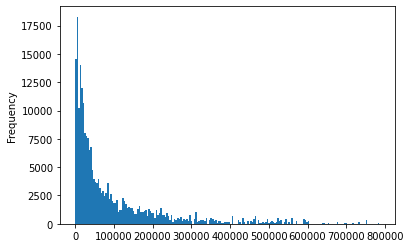

In [17]:
condominium['lotsizesquarefeet'].plot(kind = 'hist', bins = 200, range = [1.080000e+02, 785445.0])

(108.0, 785445.0)

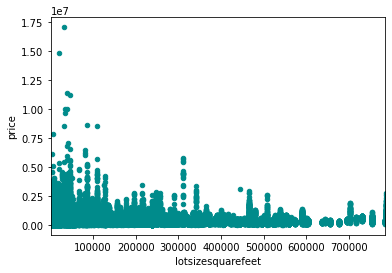

In [18]:
plt1 = condominium.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'darkcyan')
plt1.set_xlim([1.080000e+02, 785445.0])

In [19]:
c_big_lot = condominium[condominium['lotsizesquarefeet'] >= 7.344300e+04]

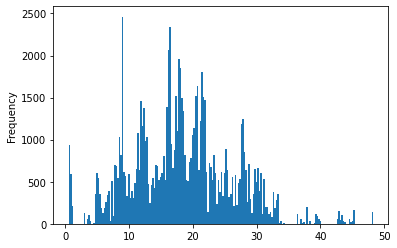

In [20]:
c_big_lot['dist_to_dtla'].plot(kind = 'hist', bins = 200)

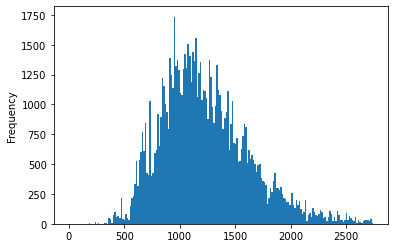

In [21]:
c_big_lot['calculatedfinishedsquarefeet'].plot(kind = 'hist', bins =200, range =[cc_min, cc_max])

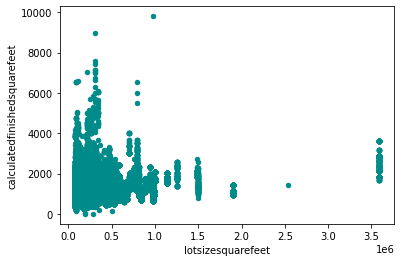

In [22]:
c_big_lot.plot(kind = 'scatter',
              x = 'lotsizesquarefeet',
              y = 'calculatedfinishedsquarefeet',
              color = 'darkcyan')

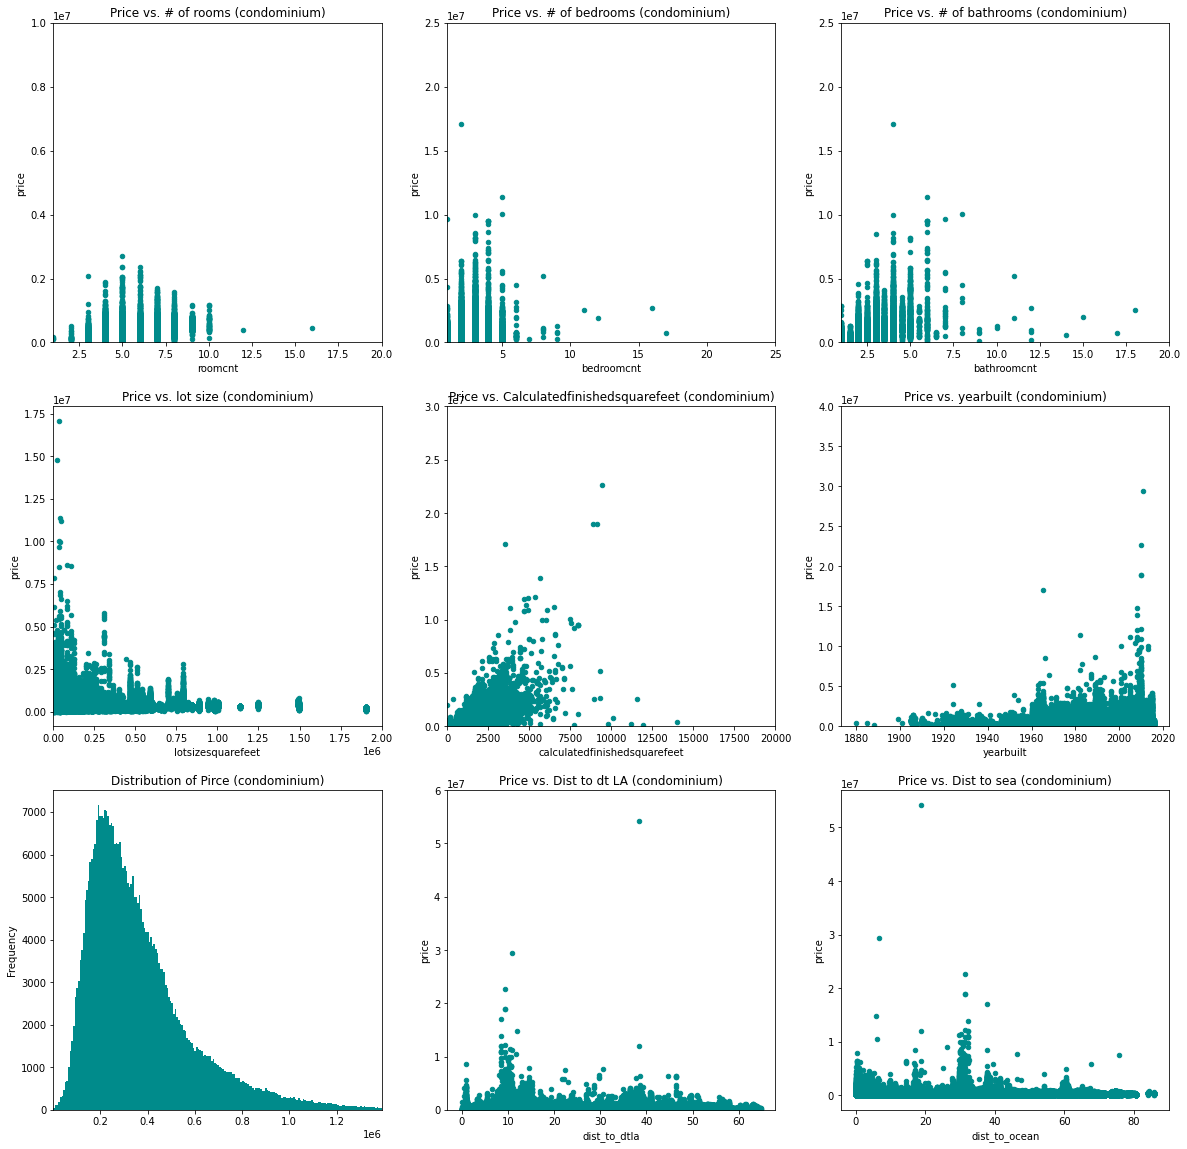

In [23]:
#arrange layout
fig, axes = plt.subplots(nrows=3, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# scatter plot between # of rooms and price
condominium.plot(kind = 'scatter',
        x = 'roomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 0])
#remove cases when room count >0,<20
axes[0, 0].set_xlim(1,20)
axes[0, 0].set_ylim(0,10000000)
axes[0, 0].set_title('Price vs. # of rooms (condominium)')

# scatter plot between # of bedrooms and price
condominium.plot(kind = 'scatter',
        x = 'bedroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 1])
#remove cases when bedroom count = 0
axes[0, 1].set_xlim(1,25)
axes[0, 1].set_ylim(0,25000000)
axes[0, 1].set_title('Price vs. # of bedrooms (condominium)')
    
# scatter plot between # of bathrooms and price
condominium.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 2])
#remove cases when bathroom count = 0
axes[0, 2].set_xlim(1,20)
axes[0, 2].set_ylim(0,25000000)
axes[0, 2].set_title('Price vs. # of bathrooms (condominium)')

# scatter plot between lot size and price
condominium.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 0])
#remove cases lot size > 200000
axes[1, 0].set_xlim(0,2000000)
axes[1, 0].set_title('Price vs. lot size (condominium)')

# scatter plot between calculatedfinishedsquarefeet and price
condominium.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 1])
#plot area less than 200000squarefeet,remove outliers
axes[1, 1].set_xlim(0,20000)
axes[1, 1].set_ylim(0,30000000)
axes[1, 1].set_title('Price vs. Calculatedfinishedsquarefeet (condominium)')

# scatter plot between yearbuilt and price
condominium.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 2])
axes[1, 2].set_ylim(0,40000000)
axes[1, 2].set_title('Price vs. yearbuilt (condominium)')


# histogram of price
# Here we use the interveal from min to 99 percentile of the price.
condominium['price'].plot(kind = 'hist', 
                          bins= 200, 
                          range =[c_min, c_max],
                          color = 'darkcyan',
                          ax = axes[2,0])

axes[2, 0].set_title('Distribution of Pirce (condominium)')
axes[2, 0].set_xlim(c_min, c_max)

# scatter plot between distance to downtown LA and price
condominium.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 1])
#axes[2, 1].set_xlim(1,30)
axes[2, 1].set_ylim(0,60000000)
axes[2, 1].set_title('Price vs. Dist to dt LA (condominium)')

# scatter plot between distance to sea and price
condominium.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 2])
#axes[2, 2].set_xlim(1,30)
#axes[2, 2].set_ylim(0,60000000)
axes[2, 2].set_title('Price vs. Dist to sea (condominium)')

plt.show()

In [40]:
single_family.sort_values(by = 'lotsizesquarefeet', ascending=False).head(20)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,price,dist_to_dtla,dist_to_ocean
1749799,14340985,NaN,NaN,NaN,5.5,5.0,NaN,NaN,5.5,NaN,NaN,4145.0,4145.0,NaN,NaN,NaN,NaN,6059.0,NaN,5.0,2.0,654.0,NaN,NaN,33742103.0,-117759040.0,371000512.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,52650.0,1286.0,403127.0,96939.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2015.0,NaN,NaN,809200.0,1862880.0,2016.0,1053680.0,26429.90,NaN,NaN,6.059052e+13,2.402937e+06,35.322761,27.338813
1751892,11259559,NaN,NaN,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,576.0,576.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,NaN,34579784.0,-117692703.0,28430904.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCA25*,6.037900e+07,40227.0,3101.0,NaN,97344.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1946.0,NaN,NaN,1289.0,685516.0,2016.0,684227.0,7841.43,NaN,NaN,6.037900e+13,6.572718e+05,48.620871,92.958983
1747966,11351650,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1476.0,1476.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34783383.0,-118655907.0,26166748.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCA21*,6.037901e+07,5534.0,3101.0,NaN,97319.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1976.0,NaN,NaN,92781.0,314370.0,2016.0,221589.0,3719.68,NaN,NaN,6.037901e+13,3.117851e+05,55.736764,50.305059
1904024,11341270,NaN,NaN,NaN,1.0,2.0,NaN,3.0,1.0,NaN,NaN,2264.0,2264.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,NaN,34723540.0,-118549360.0,14043439.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCA25*,6.037901e+07,5534.0,3101.0,NaN,97316.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1902.0,NaN,NaN,72164.0,2401565.0,2016.0,2329401.0,27146.97,NaN,NaN,6.037901e+13,2.275470e+06,49.611419,52.164245
2306048,11351683,1.0,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1694.0,1694.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34752278.0,-118705885.0,10749024.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCA25*,6.037901e+07,25468.0,3101.0,NaN,97316.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2010.0,NaN,NaN,149295.0,653968.0,2016.0,504673.0,7535.23,NaN,NaN,6.037901e+13,6.316060e+05,55.069400,46.781997
2171003,11335038,NaN,NaN,NaN,1.0,3.0,NaN,6.0,1.0,NaN,NaN,1152.0,1152.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,7.0,34639356.0,-118351377.0,10497786.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCA22*,6.037901e+07,40227.0,3101.0,NaN,97329.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1937.0,NaN,NaN,98707.0,960973.0,2016.0,862266.0,10953.25,NaN,NaN,6.037901e+13,9.181058e+05,41.197059,58.779755
8508,17295969,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6111.0,NaN,NaN,NaN,NaN,NaN,NaN,34068073.0,-118969010.0,10201752.0,NaN,NaN,NaN,NaN,NaN,1112,261.0,NaN,6.111007e+07,12520.0,2061.0,NaN,96116.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207260.0,1305605.0,2016.0,1098345.0,14237.54,NaN,NaN,NaN,1.220430e+06,41.075758,1.280294
1084990,17103496,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,2484.0,2484.0,2484.0,NaN,NaN,2484.0,NaN,6111.0,1.0,2.0,NaN,NaN,NaN,NaN,34238761.0,-119027805.0,7979756.0,NaN,NaN,NaN,NaN,NaN,1112,261.0,NaN,6.111005e+07,51239.0,2061.0,NaN,97089.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1970.0,1.0,NaN,261325.0,1142968.0,2016.0,881643.0,12535.46,NaN,NaN,6.111005e+13,1.074529e+06,46.275194,13.427139
28849,11340355,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,480.0,48

#### Multi-Unit Home EDA

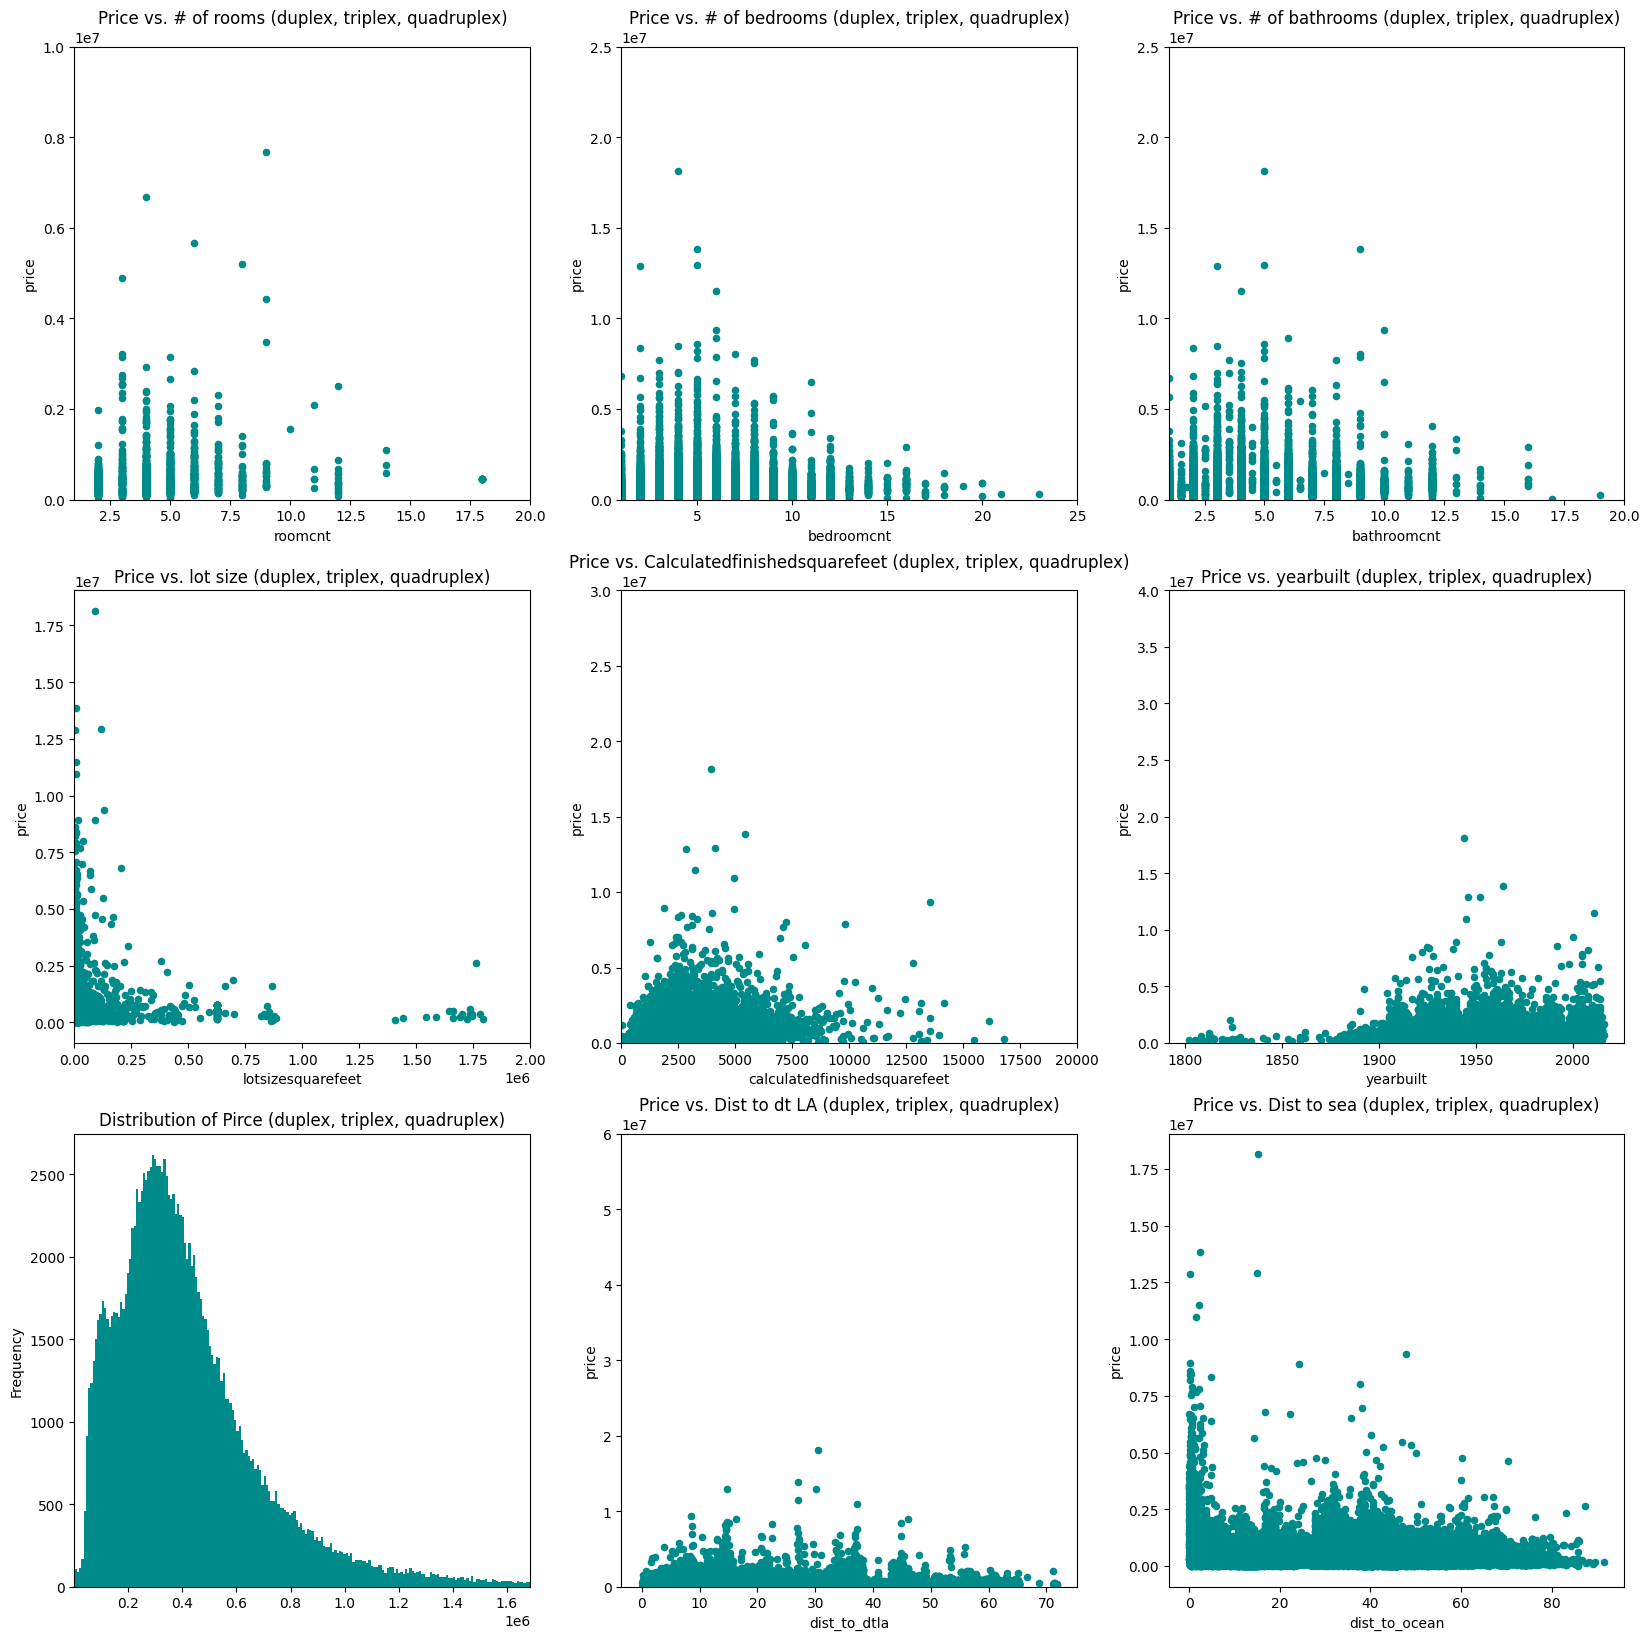

In [20]:
#arrange layout
fig, axes = plt.subplots(nrows=3, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# scatter plot between # of rooms and price
multi_unit_home.plot(kind = 'scatter',
        x = 'roomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 0])
#remove cases when room count >0,<20
axes[0, 0].set_xlim(1,20)
axes[0, 0].set_ylim(0,10000000)
axes[0, 0].set_title('Price vs. # of rooms (duplex, triplex, quadruplex)')

# scatter plot between # of bedrooms and price
multi_unit_home.plot(kind = 'scatter',
        x = 'bedroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 1])
#remove cases when bedroom count = 0
axes[0, 1].set_xlim(1,25)
axes[0, 1].set_ylim(0,25000000)
axes[0, 1].set_title('Price vs. # of bedrooms (duplex, triplex, quadruplex)')
    
# scatter plot between # of bathrooms and price
multi_unit_home.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 2])
#remove cases when bathroom count = 0
axes[0, 2].set_xlim(1,20)
axes[0, 2].set_ylim(0,25000000)
axes[0, 2].set_title('Price vs. # of bathrooms (duplex, triplex, quadruplex)')

# scatter plot between lot size and price
multi_unit_home.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 0])
#remove cases lot size > 200000
axes[1, 0].set_xlim(0,2000000)
axes[1, 0].set_title('Price vs. lot size (duplex, triplex, quadruplex)')

# scatter plot between calculatedfinishedsquarefeet and price
multi_unit_home.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 1])
#plot area less than 200000squarefeet,remove outliers
axes[1, 1].set_xlim(0,20000)
axes[1, 1].set_ylim(0,30000000)
axes[1, 1].set_title('Price vs. Calculatedfinishedsquarefeet (duplex, triplex, quadruplex)')

# scatter plot between yearbuilt and price
multi_unit_home.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 2])
axes[1, 2].set_ylim(0,40000000)
axes[1, 2].set_title('Price vs. yearbuilt (duplex, triplex, quadruplex)')


# histogram of price
# Here we use the interveal from min to 99 percentile of the price.
multi_unit_home['price'].plot(kind = 'hist', 
                          bins= 200, 
                          range =[multi_min, multi_max],
                          color = 'darkcyan',
                          ax = axes[2,0])

axes[2, 0].set_title('Distribution of Pirce (duplex, triplex, quadruplex)')
axes[2, 0].set_xlim(multi_min, multi_max)

# scatter plot between distance to downtown LA and price
multi_unit_home.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 1])
#axes[2, 1].set_xlim(1,30)
axes[2, 1].set_ylim(0,60000000)
axes[2, 1].set_title('Price vs. Dist to dt LA (duplex, triplex, quadruplex)')

# scatter plot between distance to sea and price
multi_unit_home.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 2])
#axes[2, 2].set_xlim(1,30)
#axes[2, 2].set_ylim(0,60000000)
axes[2, 2].set_title('Price vs. Dist to sea (duplex, triplex, quadruplex)')

plt.show()

#### Single-Family Home EDA

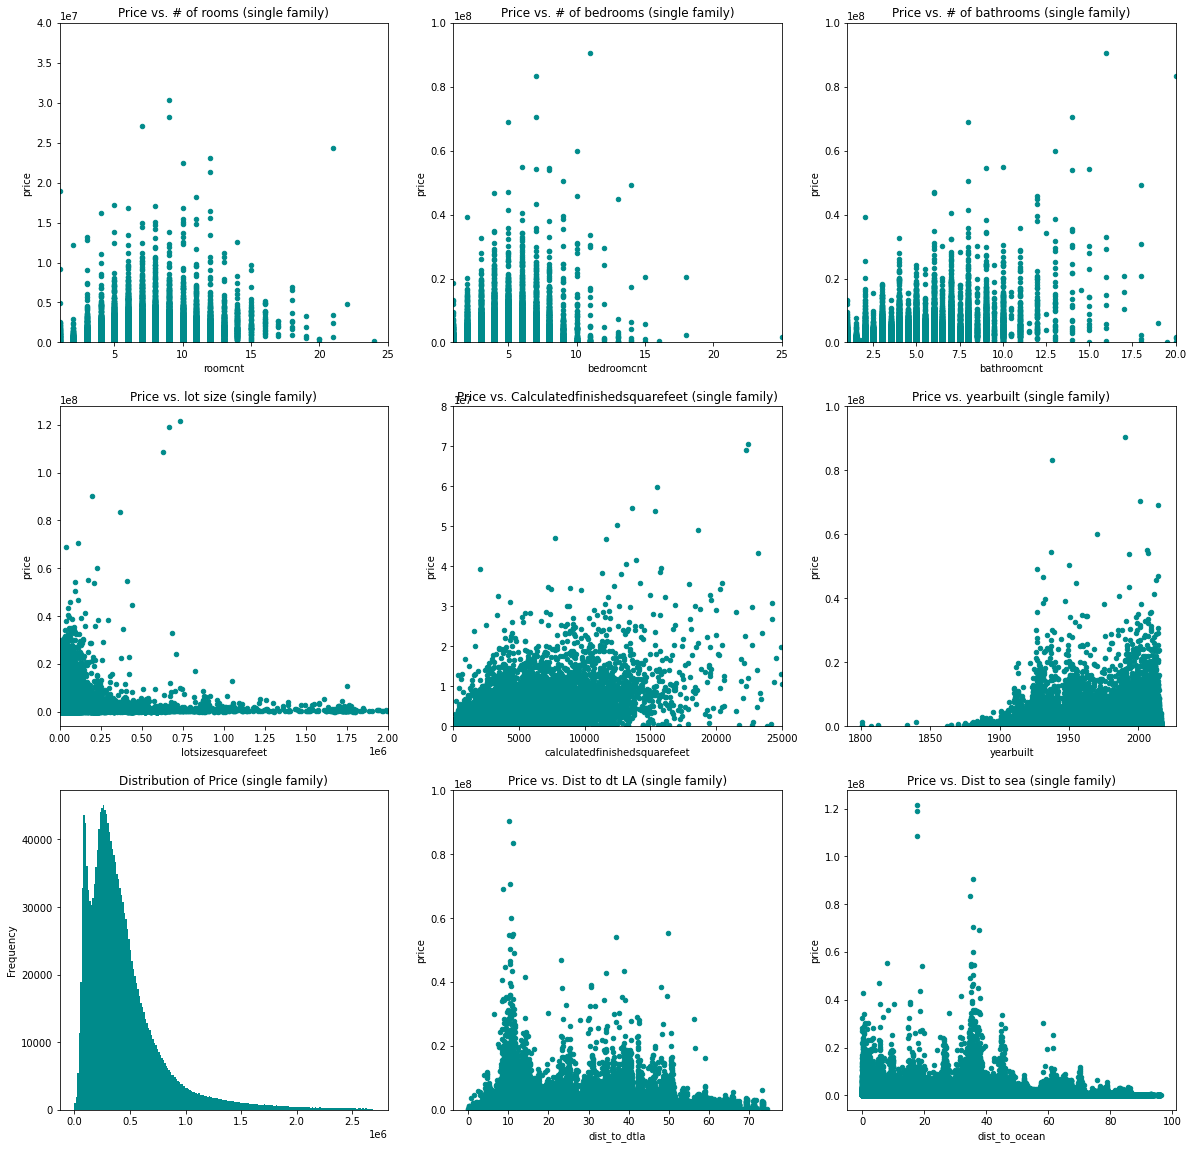

In [37]:
#arrange layout
fig, axes = plt.subplots(nrows=3, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# scatter plot between # of rooms and price
single_family.plot(kind = 'scatter',
        x = 'roomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 0])
#remove cases when room count >0,<25
axes[0, 0].set_xlim(1,25)
axes[0, 0].set_ylim(0,40000000)
axes[0, 0].set_title('Price vs. # of rooms (single family)')

# scatter plot between # of bedrooms and price
single_family.plot(kind = 'scatter',
        x = 'bedroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 1])
#remove cases when bedroom count = 0
axes[0, 1].set_xlim(1,25)
axes[0, 1].set_ylim(0,100000000)
axes[0, 1].set_title('Price vs. # of bedrooms (single family)')
    
# scatter plot between # of bathrooms and price
single_family.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 2])
#remove cases when bathroom count = 0
axes[0, 2].set_xlim(1,20)
axes[0, 2].set_ylim(0,100000000)
axes[0, 2].set_title('Price vs. # of bathrooms (single family)')

# scatter plot between lot size and price
single_family.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 0])
#remove cases lot size > 200000
axes[1, 0].set_xlim(0,2000000)
axes[1, 0].set_title('Price vs. lot size (single family)')

# scatter plot between calculatedfinishedsquarefeet and price
single_family.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 1])
#plot area less than 200000squarefeet,remove outliers
axes[1, 1].set_xlim(0,25000)
axes[1, 1].set_ylim(0,80000000)
axes[1, 1].set_title('Price vs. Calculatedfinishedsquarefeet (single family)')

# scatter plot between yearbuilt and price
single_family.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 2])
#remove cases when price > 30000000
axes[1, 2].set_ylim(0,100000000)
axes[1, 2].set_title('Price vs. yearbuilt (single family)')

# scatter plot between propertylandusetypeid and price
single_family['price'].plot(kind = 'hist', 
                          bins= 200, 
                          range =[1.550677e+02, 2686383.845462005],
                          color = 'darkcyan',
                          ax = axes[2,0])
axes[2, 0].set_title('Distribution of Price (single family)')

# scatter plot between distance to downtown LA and price
single_family.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 1])
#axes[2, 1].set_xlim(1,30)
axes[2, 1].set_ylim(0,100000000)
axes[2, 1].set_title('Price vs. Dist to dt LA (single family)')

# scatter plot between distance to sea and price
single_family.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 2])
#axes[2, 2].set_xlim(1,30)
#axes[2, 2].set_ylim(0,60000000)
axes[2, 2].set_title('Price vs. Dist to sea (single family)')

plt.show()

In [10]:
single_family['roomcnt'].describe()

count    1.718427e+06
mean     1.868775e+00
std      3.124617e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      9.600000e+01
Name: roomcnt, dtype: float64

In [24]:
single_family['lotsizesquarefeet'].describe()

count    1.708335e+06
mean     1.103186e+04
std      2.944079e+05
min      1.040000e+02
25%      5.634000e+03
50%      6.760000e+03
75%      8.550000e+03
max      3.710005e+08
Name: lotsizesquarefeet, dtype: float64

In [28]:
# filter out single family house with >75 quantile lot size
big_lot_sf = single_family[single_family['lotsizesquarefeet'] > 8.550000e+03]

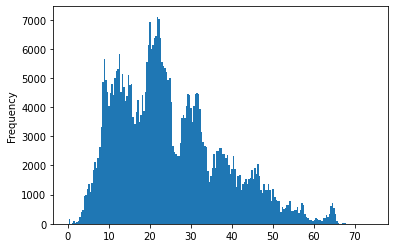

In [26]:
big_lot_sf['dist_to_dtla'].plot(kind = 'hist', bins =200)

In [27]:
big_lot_sf['calculatedfinishedsquarefeet'].describe()

count    425035.000000
mean       2512.986808
std        1360.900954
min           1.000000
25%        1672.000000
50%        2215.000000
75%        2968.000000
max       52503.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [29]:
big_lot_sf['calculatedfinishedsquarefeet'].quantile(0.999)

12708.864000000292

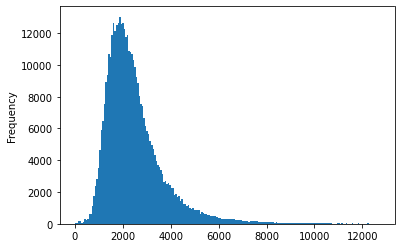

In [30]:
big_lot_sf['calculatedfinishedsquarefeet'].plot(kind = 'hist', bins =200, range = [1,12708.864000000292])

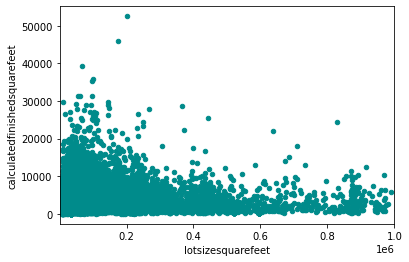

In [31]:
big_lot_sf.plot(kind = 'scatter',
              x = 'lotsizesquarefeet',
              y = 'calculatedfinishedsquarefeet',
              color = 'darkcyan',
              xlim=[1,1000000])

In [32]:
big_lot_sf['price'].describe()

count    4.270550e+05
mean     7.247445e+05
std      1.184963e+06
min      5.314213e+02
25%      2.739565e+05
50%      4.762281e+05
75%      7.879055e+05
max      1.216252e+08
Name: price, dtype: float64

In [33]:
big_lot_sf['price'].quantile(0.99)

4823659.783056046

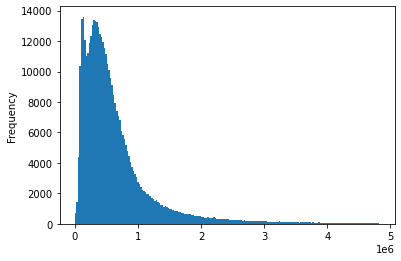

In [34]:
big_lot_sf['price'].plot(kind = 'hist', bins =200, range =  [5.314213e+02,4823659.783056046] )

In [35]:
big_lot_sf.sort_values(by = 'lotsizesquarefeet', ascending=False).head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,price,dist_to_dtla,dist_to_ocean
1749799,14340985,NaN,NaN,NaN,5.5,5.0,NaN,NaN,5.5,NaN,...,1862880.0,2016.0,1053680.0,26429.90,NaN,NaN,6.059052e+13,2.402937e+06,35.322761,27.338813
1751892,11259559,NaN,NaN,NaN,1.0,2.0,NaN,1.0,1.0,NaN,...,685516.0,2016.0,684227.0,7841.43,NaN,NaN,6.037900e+13,6.572718e+05,48.620871,92.958983
1747966,11351650,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,314370.0,2016.0,221589.0,3719.68,NaN,NaN,6.037901e+13,3.117851e+05,55.736764,50.305059
1904024,11341270,NaN,NaN,NaN,1.0,2.0,NaN,3.0,1.0,NaN,...,2401565.0,2016.0,2329401.0,27146.97,NaN,NaN,6.037901e+13,2.275470e+06,49.611419,52.164245
2306048,11351683,1.0,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,...,653968.0,2016.0,504673.0,7535.23,NaN,NaN,6.037901e+13,6.316060e+05,55.069400,46.781997
2171003,11335038,NaN,NaN,NaN,1.0,3.0,NaN,6.0,1.0,NaN,...,960973.0,2016.0,862266.0,10953.25,NaN,NaN,6.037901e+13,9.181058e+05,41.197059,58.779755
8508,17295969,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1305605.0,2016.0,1098345.0,14237.54,NaN,NaN,NaN,1.220430e+06,41.075758,1.280294
1084990,17103496,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1142968.0,2016.0,881643.0,12535.46,NaN,NaN,6.111005e+13,1.074529e+06,46.275194,13.427139
28849,11340355,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,159038.0,2016.0,158912.0,2037.12,NaN,NaN,6.037901e+13,1.707522e+05,48.767091,57.113054
182788,11241247,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,67165.0,2016.0,16217.0,989.49,NaN,NaN,6.037911e+13,8.293945e+04,30.679177,64.949162


In [36]:
big_lot_sf.sort_values(by = 'calculatedfinishedsquarefeet', ascending=False).head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,price,dist_to_dtla,dist_to_ocean
800736,11642367,1.0,NaN,NaN,16.0,11.0,NaN,NaN,16.0,NaN,...,90188462.0,2016.0,26526018.0,1078101.87,Y,15.0,6.037265e+13,9.036693e+07,10.187191,35.772384
774608,11645264,1.0,NaN,NaN,10.0,6.0,NaN,NaN,10.0,NaN,...,54748308.0,2016.0,17740340.0,655557.04,NaN,NaN,6.037262e+13,5.494905e+07,11.096252,34.978706
844268,11645396,1.0,NaN,NaN,32.0,10.0,NaN,NaN,32.0,NaN,...,31038350.0,2016.0,3616243.0,372142.72,NaN,NaN,6.037262e+13,3.119315e+07,10.977570,35.177503
1290265,11639520,1.0,NaN,NaN,11.0,8.0,NaN,NaN,11.0,NaN,...,15971597.0,2016.0,10355056.0,192105.67,NaN,NaN,6.037701e+13,1.610237e+07,9.656059,36.634891
1910484,11645393,1.0,NaN,NaN,15.0,7.0,NaN,NaN,15.0,NaN,...,54113075.0,2016.0,37879153.0,647221.37,NaN,NaN,6.037262e+13,5.425035e+07,10.941647,35.205847
746011,11642335,1.0,NaN,NaN,12.0,10.0,NaN,NaN,12.0,NaN,...,45563526.0,2016.0,26923902.0,545031.69,NaN,NaN,6.037265e+13,4.568477e+07,10.498645,35.510798
669279,11887283,1.0,NaN,NaN,19.0,10.0,NaN,12.0,19.0,NaN,...,6401936.0,2016.0,882417.0,73571.72,NaN,NaN,6.037464e+13,6.166811e+06,8.317193,60.721447
1767150,11655017,1.0,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,...,33367596.0,2016.0,4039185.0,399369.47,NaN,NaN,6.037261e+13,3.347531e+07,10.512734,44.913233
366858,12689236,1.0,NaN,NaN,14.0,11.0,NaN,NaN,14.0,NaN,...,33437863.0,2016.0,8896171.0,363213.73,NaN,NaN,6.037670e+13,3.044472e+07,19.789068,0.789001
1329784,12038087,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,200158.0,2016.0,62521.0,3976.03,NaN,NaN,6.037188e+13,3.332724e+05,4.898494,52.986166


#### Townhouse EDA

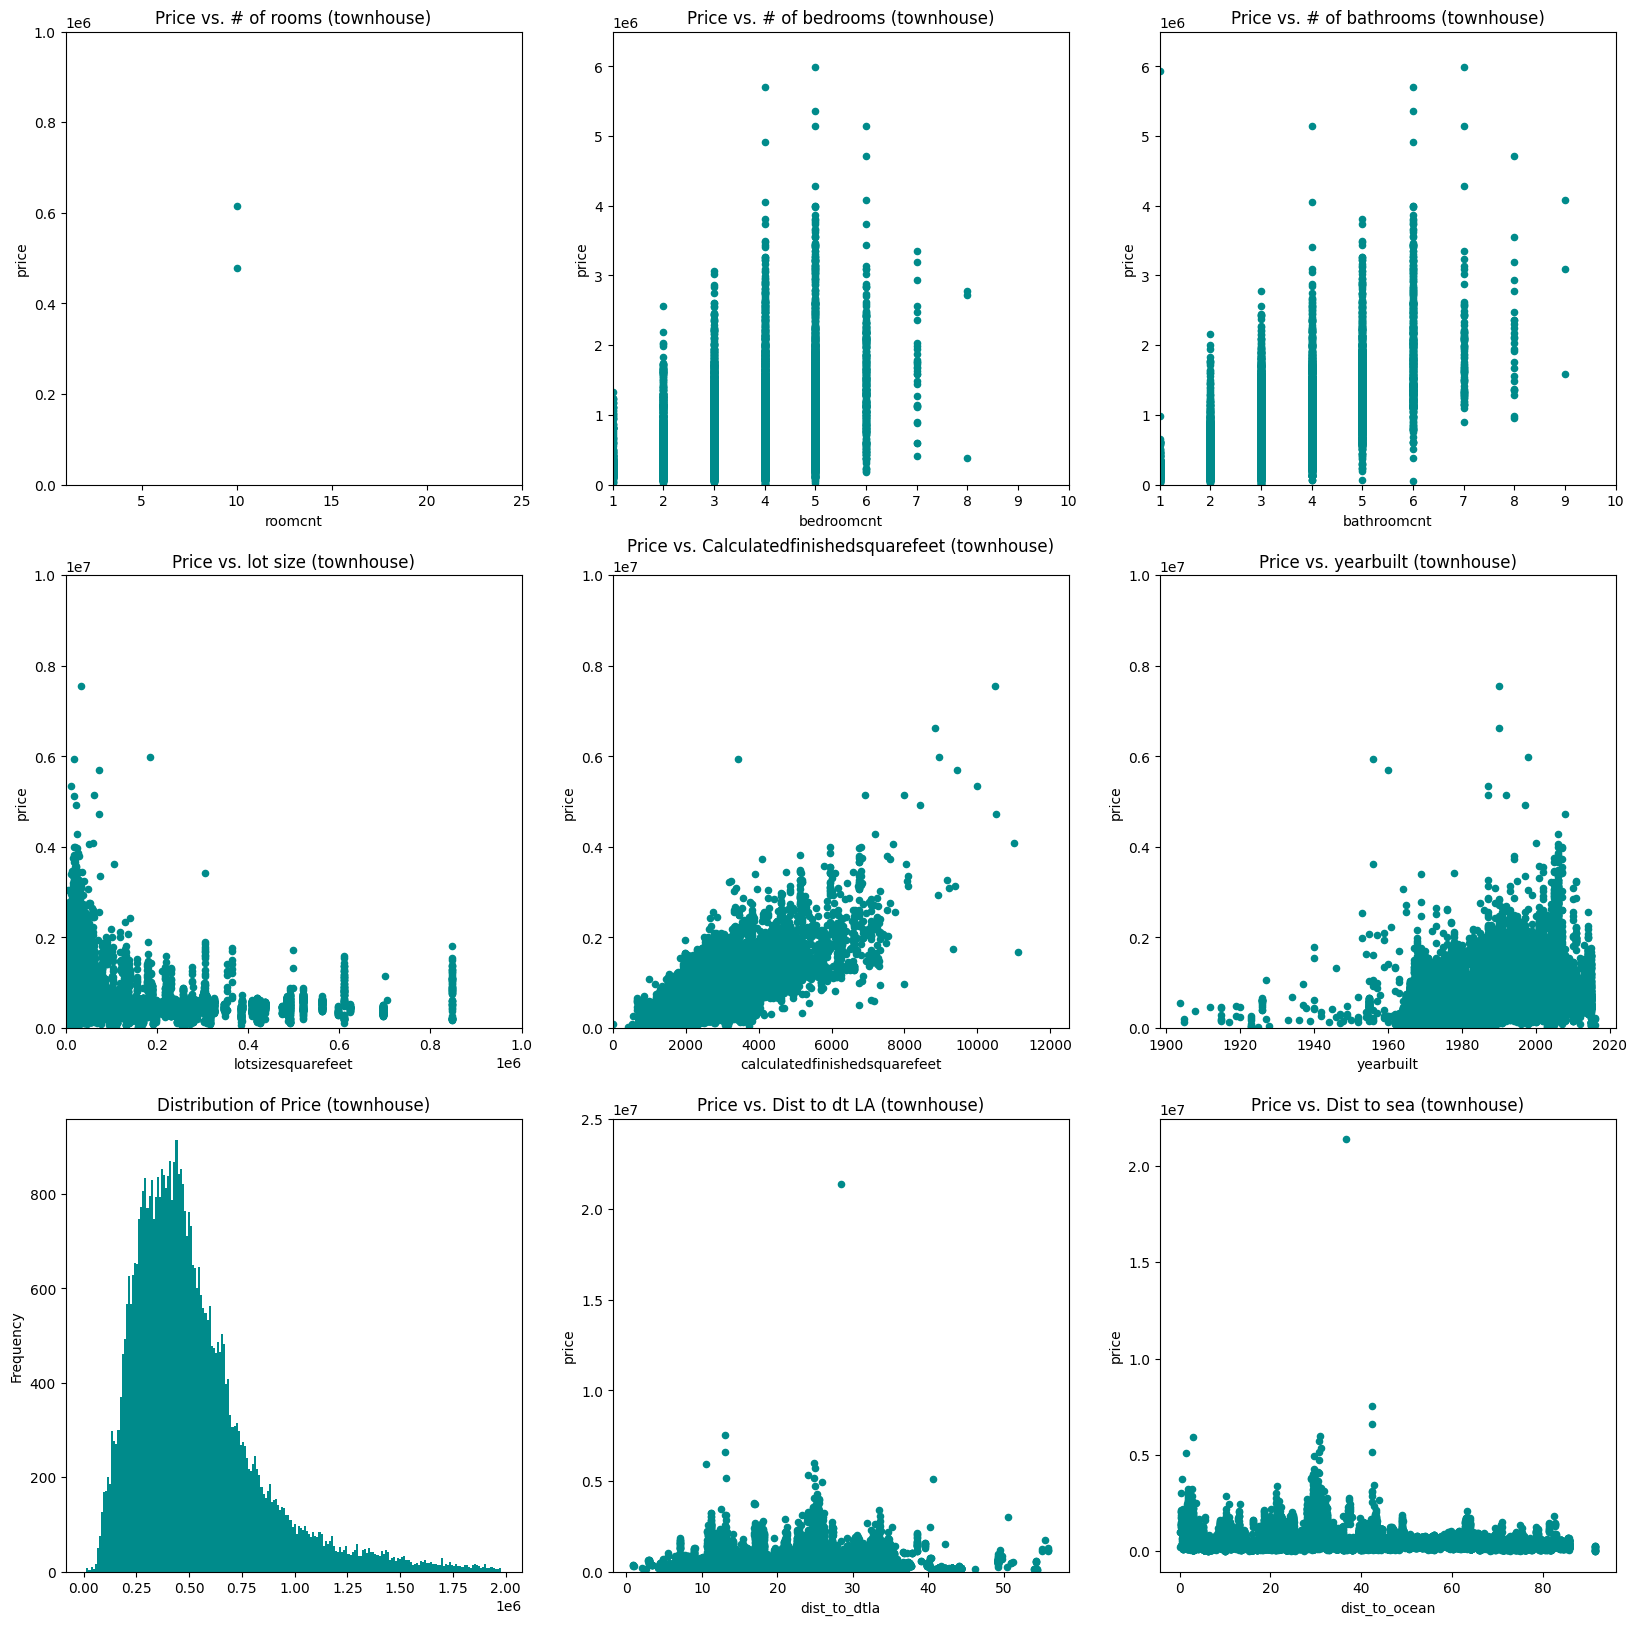

In [22]:
#arrange layout
fig, axes = plt.subplots(nrows=3, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# scatter plot between # of rooms and price
townhouse.plot(kind = 'scatter',
        x = 'roomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 0])
#remove cases when room count >0,<25
axes[0, 0].set_xlim(1,25)
axes[0, 0].set_ylim(0,1000000)
axes[0, 0].set_title('Price vs. # of rooms (townhouse)')

# scatter plot between # of bedrooms and price
townhouse.plot(kind = 'scatter',
        x = 'bedroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 1])
#remove cases when bedroom count = 0
axes[0, 1].set_xlim(1,10)
axes[0, 1].set_ylim(0,6500000)
axes[0, 1].set_title('Price vs. # of bedrooms (townhouse)')
    
# scatter plot between # of bathrooms and price
townhouse.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 2])
#remove cases when bathroom count = 0
axes[0, 2].set_xlim(1,10)
axes[0, 2].set_ylim(0,6500000)
axes[0, 2].set_title('Price vs. # of bathrooms (townhouse)')

# scatter plot between lot size and price
townhouse.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 0])
#remove cases lot size > 200000
axes[1, 0].set_xlim(0,1000000)
axes[1, 0].set_ylim(0,10000000)
axes[1, 0].set_title('Price vs. lot size (townhouse)')

# scatter plot between calculatedfinishedsquarefeet and price
townhouse.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 1])
#plot area less than 200000squarefeet,remove outliers
axes[1, 1].set_xlim(0,12500)
axes[1, 1].set_ylim(0,10000000)
axes[1, 1].set_title('Price vs. Calculatedfinishedsquarefeet (townhouse)')

# scatter plot between yearbuilt and price
townhouse.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 2])
#remove cases when price > 30000000
axes[1, 2].set_ylim(0,10000000)
axes[1, 2].set_title('Price vs. yearbuilt (townhouse)')

# scatter plot between propertylandusetypeid and price
townhouse['price'].plot(kind = 'hist', 
                          bins= 200, 
                          range =[t_min, t_max],
                          color = 'darkcyan',
                          ax = axes[2,0])
axes[2, 0].set_title('Distribution of Price (townhouse)')

# scatter plot between distance to downtown LA and price
townhouse.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 1])
#axes[2, 1].set_xlim(1,30)
axes[2, 1].set_ylim(0,25000000)
axes[2, 1].set_title('Price vs. Dist to dt LA (townhouse)')

# scatter plot between distance to sea and price
townhouse.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 2])
#axes[2, 2].set_xlim(1,30)
#axes[2, 2].set_ylim(0,60000000)
axes[2, 2].set_title('Price vs. Dist to sea (townhouse)')

plt.show()

#### Mobile Home EDA

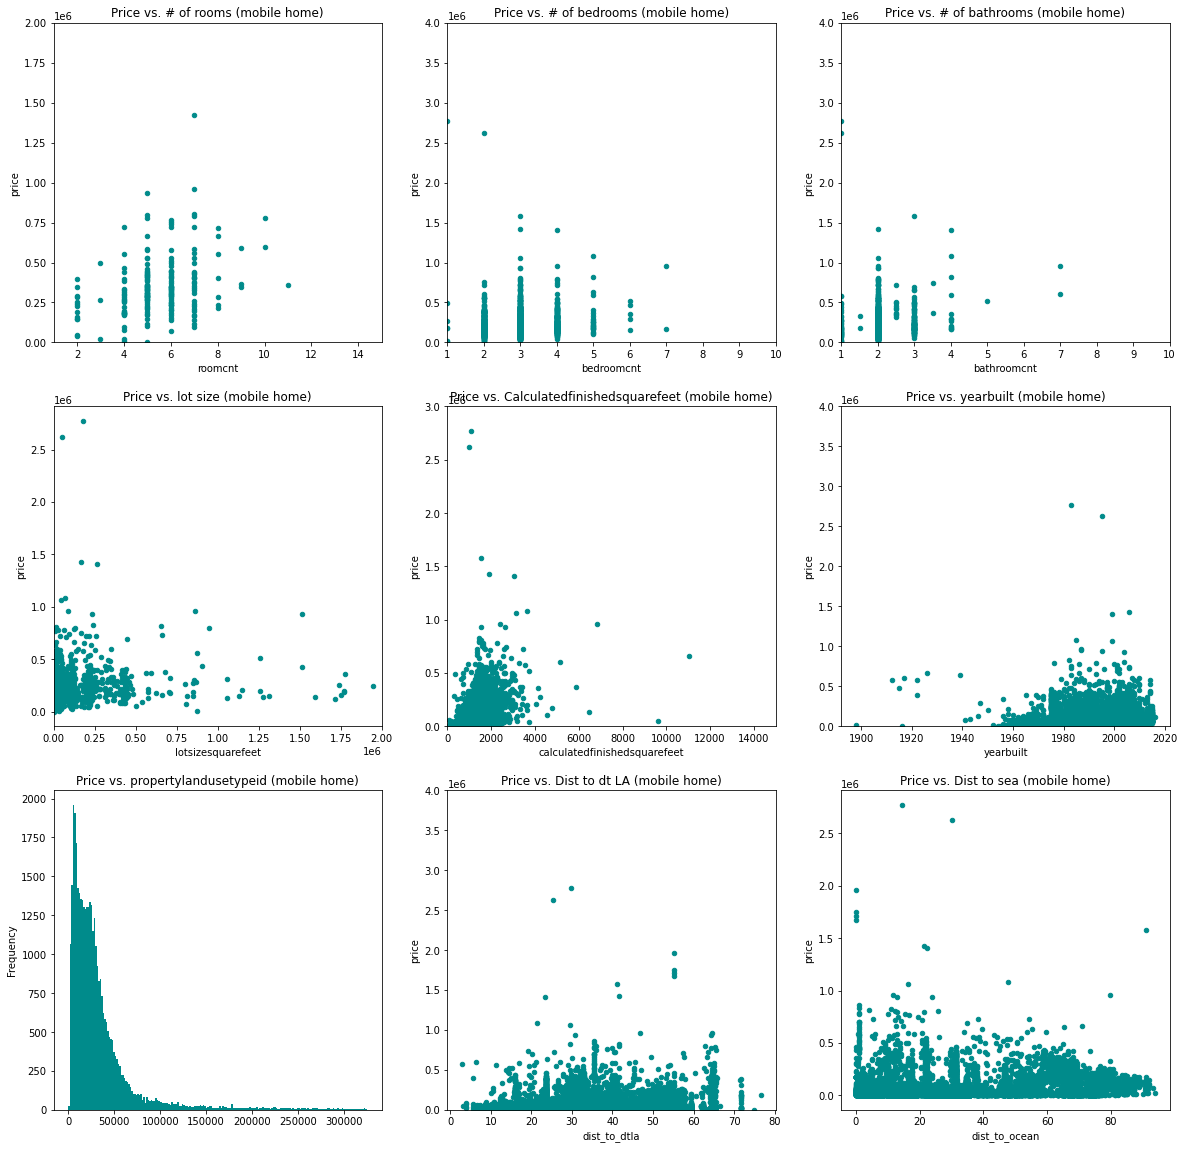

In [189]:
#arrange layout
fig, axes = plt.subplots(nrows=3, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# scatter plot between # of rooms and price
mobile_home.plot(kind = 'scatter',
        x = 'roomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 0])
#remove cases when room count >0,<25
axes[0, 0].set_xlim(1,15)
axes[0, 0].set_ylim(0,2000000)
axes[0, 0].set_title('Price vs. # of rooms (mobile home)')

# scatter plot between # of bedrooms and price
mobile_home.plot(kind = 'scatter',
        x = 'bedroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 1])
#remove cases when bedroom count = 0
axes[0, 1].set_xlim(1,10)
axes[0, 1].set_ylim(0,4000000)
axes[0, 1].set_title('Price vs. # of bedrooms (mobile home)')
    
# scatter plot between # of bathrooms and price
mobile_home.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[0, 2])
#remove cases when bathroom count = 0
axes[0, 2].set_xlim(1,10)
axes[0, 2].set_ylim(0,4000000)
axes[0, 2].set_title('Price vs. # of bathrooms (mobile home)')

# scatter plot between lot size and price
mobile_home.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 0])
#remove cases lot size > 2000000
axes[1, 0].set_xlim(0,2000000)
axes[1, 0].set_title('Price vs. lot size (mobile home)')

# scatter plot between calculatedfinishedsquarefeet and price
mobile_home.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 1])
#plot area less than 200000squarefeet,remove outliers
axes[1, 1].set_xlim(0,15000)
axes[1, 1].set_ylim(0,3000000)
axes[1, 1].set_title('Price vs. Calculatedfinishedsquarefeet (mobile home)')

# scatter plot between yearbuilt and price
mobile_home.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'price',
        color = 'darkcyan',
        ax=axes[1, 2])
#remove cases when price > 30000000
axes[1, 2].set_ylim(0,4000000)
axes[1, 2].set_title('Price vs. yearbuilt (mobile home)')

# scatter plot between propertylandusetypeid and price
mobile_home['price'].plot(kind = 'hist', 
                          bins= 200, 
                          range =[m_min, m_max],
                          color = 'darkcyan',
                          ax = axes[2,0])
axes[2, 0].set_title('Price vs. propertylandusetypeid (mobile home)')

# scatter plot between distance to downtown LA and price
mobile_home.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 1])
#axes[2, 1].set_xlim(1,30)
axes[2, 1].set_ylim(0,4000000)
axes[2, 1].set_title('Price vs. Dist to dt LA (mobile home)')

# scatter plot between distance to sea and price
mobile_home.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'price',
        color = 'darkcyan',
        ax=axes[2, 2])
#axes[2, 2].set_xlim(1,30)
#axes[2, 2].set_ylim(0,60000000)
axes[2, 2].set_title('Price vs. Dist to sea (mobile home)')

plt.show()